![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

In [2]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [3]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [4]:
def getDepth(graph,node,n,depth):
  depth.append(n)
  root = graph[node]
  for i in range(len(root)):
    getDepth(graph,root[i],n+1,depth)
  return max(depth)

# **Plot the Pancake Network and calculate Pn for small n's.**

In [6]:
def plotNetworkBFS(n): #Function recieves the number of pancakes to arrange

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict(int)
        G = pydot.Dot(graph_type="digraph") 
        G.set_node_defaults(color='lightgray',style='filled',fontname='Courier',fontsize='12')      
        # Create a queue for BFS 
        queue = [] 

        #Create pancake array        
        pancakes = list(range(1,n+1)) 
  
        # Mark the source node as visited and enqueue it 
        queue.append(pancakes) 
        visited[lstr(pancakes)] = True
        while queue: 
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node) 

            for i in range(len(s)-1):
              d = s[i+1::-1] + s[i+2::]  
              if (d != s) and not(visited[lstr(d)]):
                  node = pydot.Node(lstr(d))                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
                    
        # Dsplay the pydot graph G
        step = [1]
        maxDepth = getDepth(graph,lstr(pancakes),1,step)
        print("Pn=" + str(maxDepth))
        im = Image(G.create_png())
        display(im)

Pn=5


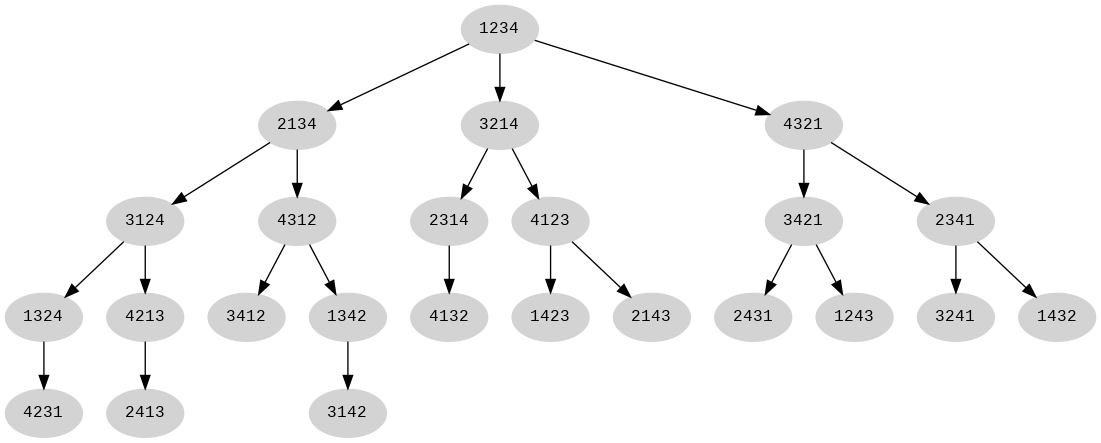

In [7]:
p = 4
plotNetworkBFS(p)

Pn=4


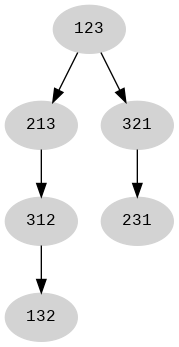

In [8]:
p = 3
plotNetworkBFS(p)

# **calculate the Pn and run the code for at least one night (8 hours) starting with n=5**

In [9]:
import datetime
def Pancakes8hoursBFS(n): #Function recieves the number of pancakes to arrange

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict(int)
        # Create a queue for BFS 
        queue = [] 
        #Create pancake array        
        pancakes = list(range(n))   
        # Mark the source node as visited and enqueue it 
        queue.append(pancakes) 
        visited[lstr(pancakes)] = True
        while queue: 
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]

            for i in range(len(s)):
              d = s[i+1::-1] + s[i+2::]  
              if (d != s) and not(visited[lstr(d)]):                  
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True                     
        # Dsplay the pydot graph G
        step = [1]
        maxDepth = getDepth(graph,lstr(pancakes),1,step)
        print("Pn=" + str(maxDepth-1))
        print("Finished at: "+ str(datetime.datetime.now()))

def pancakes8hours():
  n = 5 
  start = datetime.datetime.now()
  print("Started at: " + str(start))
  while (True):
    print("Number of pancakes: " + str(n))
    Pancakes8hoursBFS(n)
    n += 1




In [ ]:
pancakes8hours()

Started at: 2020-11-22 21:56:46.029422
Number of pancakes: 5
Pn=5
Finished at: 2020-11-22 21:56:46.031801
Number of pancakes: 6
Pn=7
Finished at: 2020-11-22 21:56:46.050337
Number of pancakes: 7
Pn=8
Finished at: 2020-11-22 21:56:46.392551
Number of pancakes: 8
Pn=9
Finished at: 2020-11-22 21:57:00.914933
Number of pancakes: 9
Pn=10
Finished at: 2020-11-22 22:15:23.436588
Number of pancakes: 10


In [4]:
import datetime
print("Time of screenshot")
print(datetime.datetime.now())

Time of screenshot
2020-11-22 13:37:03.880083


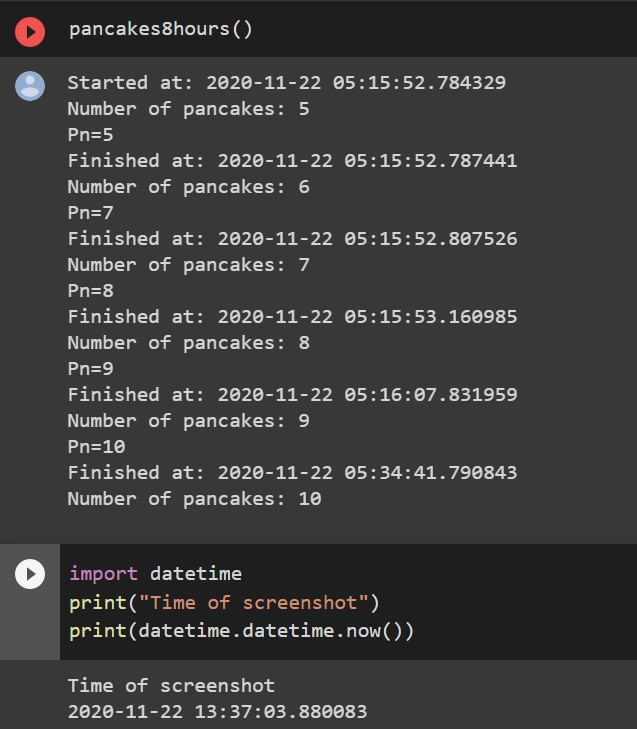

# **Pancakes trees using two spatulas.**

In [18]:
def TwoSpatulas(pancakes):
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        G.set_node_defaults(color='lightgray',style='filled',fontname='Courier',fontsize='12')
        
        queue = [] 
   
        queue.append(pancakes)
        visited[lstr(pancakes)] = True
  
        while queue:
            s = queue.pop(0) 
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            if(s != sorted(s)):
              for i in range(len(s)):
                for j in range(i+1,len(s)):
                  d = s[i::-1] + s[j:i:-1] + s[j+1:] 
                  if (d != s) and not(lstr(d) in visited.keys()):
                    if(d != sorted(d)):
                      node = pydot.Node(lstr(d))
                    else:
                      node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    queue.append(d) 
                    visited[lstr(d)] = True
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

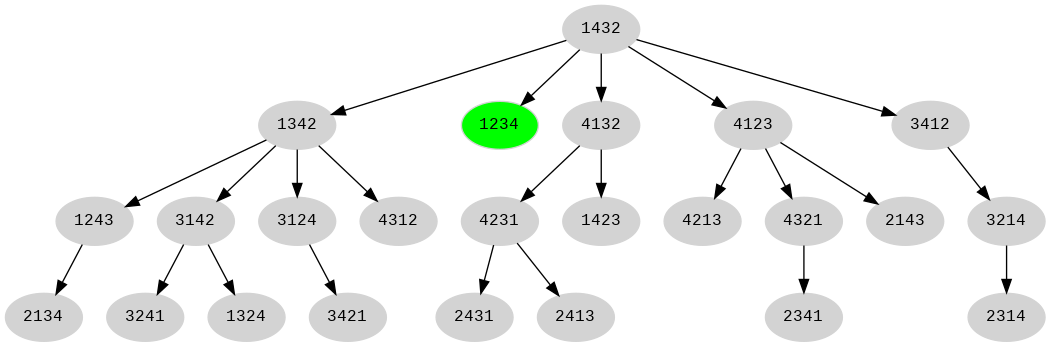

In [19]:
pancakes=[1,4,3,2]
TwoSpatulas(pancakes)

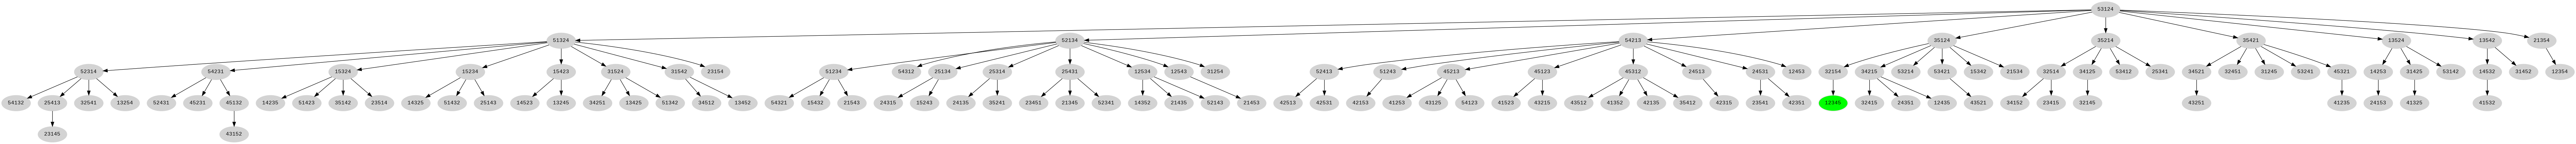

In [23]:
pancakes=[5,3,1,2,4]
TwoSpatulas(pancakes)

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


